In [65]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
from scipy.signal import freqz,lfilter,spectrogram


In [51]:
f_s=8000
f_p=1000
f_sb=1400
Dw=2*np.pi*(f_sb-f_p)/f_s
windows=['rect','hann','hamming']
wc=2*np.pi*(f_p+f_sb)/(2*f_s) # Normalized wc by f_s
hd=[]
w=[]
h=[]
results=[]

In [6]:
def estimate_N(wname,Dw):
  if wname=='rect':
    result = int(np.ceil((4*np.pi)/(Dw)))
    return result if result % 2 != 0 else result + 1
  elif wname=='hann':
    result = int(np.ceil((8*np.pi)/(Dw)))
    return result if result % 2 != 0 else result + 1
  elif wname=='hamming':
    result = int(np.ceil((8*np.pi)/(Dw)))
    return result if result % 2 != 0 else result + 1

In [42]:
def ideal_lp(f_p,f_sp,N):
  M=(N-1)/2
  for i in range(N):
    k=i-M
    if k==0:
      hd[i]=wc/np.pi
    else:
      hd[i]=np.sin(wc*k)/(np.pi*k) # Corrected the formula

In [49]:
def apply_window(hd,wname):
  if wname=='rect':
    w=np.ones(len(hd))
  elif wname=='hann':
    w=np.hanning(len(hd))
  elif wname=='hamming':
    w=np.hamming(len(hd))
  h=np.zeros(len(hd))
  for i in range(len(hd)):
    h[i]=hd[i]*w[i]

In [41]:
def desig_lpf(f_s,f_p,f_sb,wname):
  N=estimate_N(wname,Dw)
  M=(N-1)/2
  global hd, h # Declare hd and h as global
  hd = [0] * N # Initialize hd with size N
  h = [0] * N # Initialize h with size N
  ideal_lp(f_p,f_sb,N)
  apply_window(hd,wname)
  w,H=freqz(h,worN=4096)
  results.append((wname,N,w,H,h))

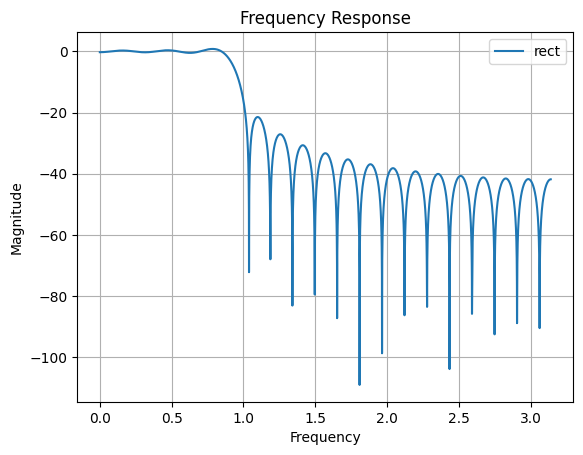

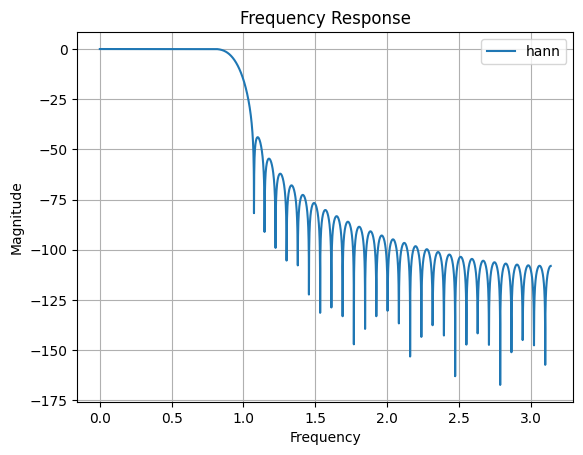

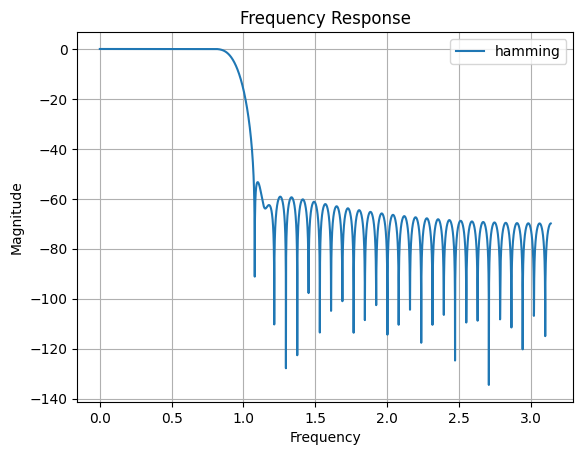

In [52]:
for wname in windows:
  desig_lpf(f_s,f_p,f_sb,wname)

for i in range(len(windows)):
  wname,N,w,H,h=results[i]

  plt.plot(w,20*np.log10(np.maximum(np.abs(H),np.power(10.0,-10))),label=wname) # Corrected np.pow(10,-10) to np.power(10.0,-10)
  plt.xlabel('Frequency')
  plt.ylabel('Magnitude')
  plt.title('Frequency Response')
  plt.legend()
  plt.grid(True)
  plt.show()

In [62]:
x,fs_file=sf.read('/content/noisy_speech_8k.wav')

In [63]:

y=lfilter(h,1,x)

In [67]:
f1, t1, Sx = spectrogram(x, fs=f_s, nperseg=256, noverlap=128)

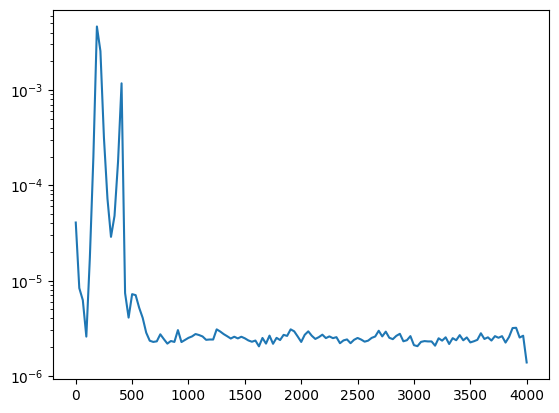

In [68]:
plt.semilogy(f1, np.mean(Sx, axis=1)+1e-12, label="Before")

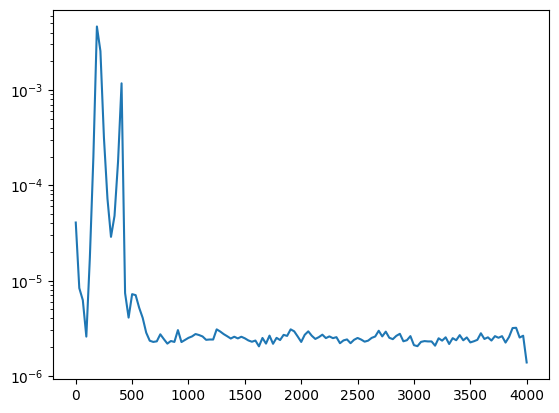

In [70]:
f2, t2, Sy = spectrogram(y, fs=f_s, nperseg=256, noverlap=128)
plt.semilogy(f2, np.mean(Sx, axis=1)+1e-12, label="Before")

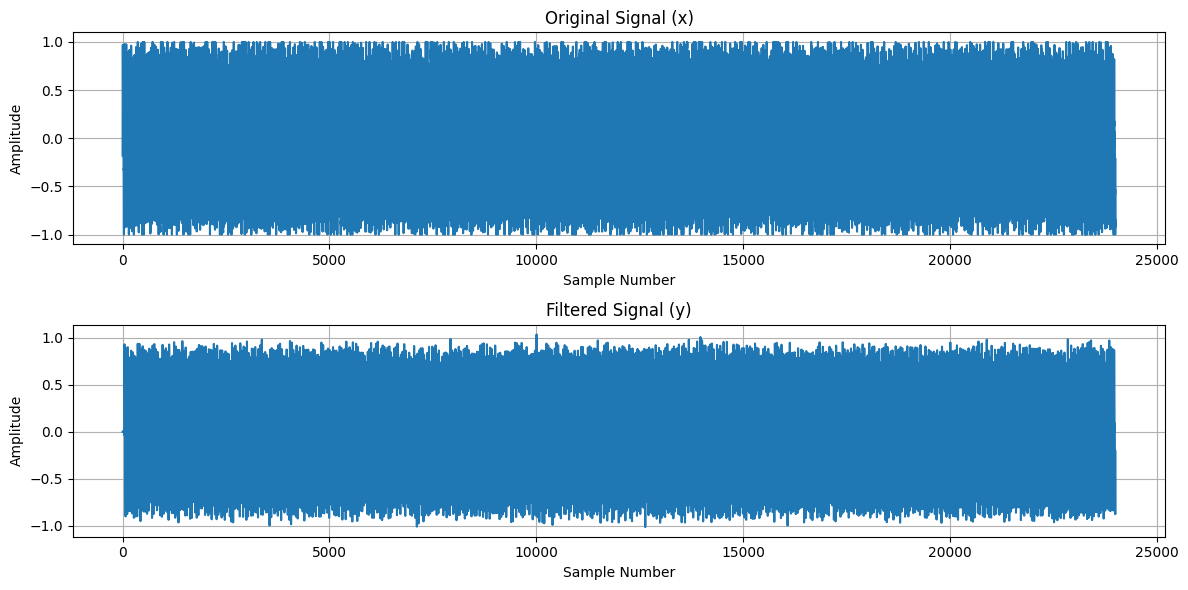

In [76]:
try:
  sf.write('denoised hamming.wav', y, f_s)
  print("Filtered signal saved successfully to 'denoised hamming.wav'")
except Exception as e:
  print(f"Error saving filtered signal: {e}")

Filtered signal saved successfully to 'denoised hamming.wav'
